# Empirical parameter distributions

In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from seqsharp.utils import load_kde, load_custom_distr
from seqsharp.stats import sample_indel_params, kde

## Sequence length and Gamma parameter

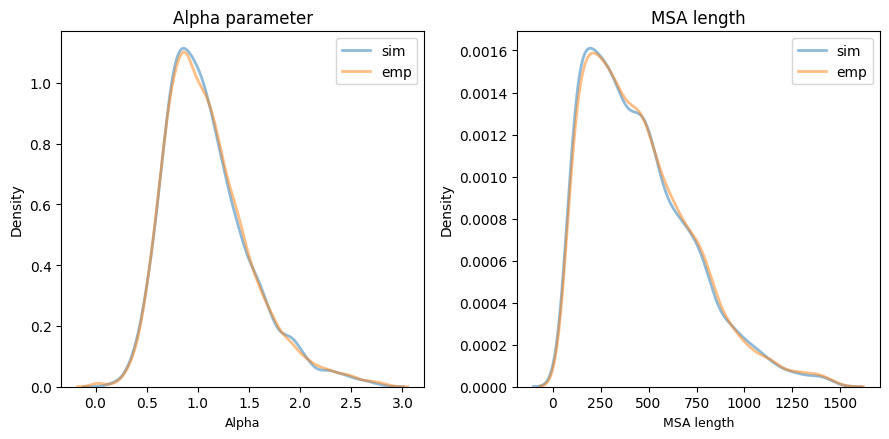

In [10]:
# seq len and gamma parameter distribution
np.random.seed(42)

# load empirical parameters
emp_msa_len = np.genfromtxt('emp_params/msa_lens_hogenom_gapless.txt')
emp_a = np.genfromtxt('emp_params/alphas.txt')

# load empirical PDFs
n_sites_pdf = load_custom_distr('emp_pdfs/n_sites_hogenom_6971.CustomPDF')
gamma_shape_pdf = load_custom_distr('emp_pdfs/gamma_shape.CustomPDF')

# draw values from empirical PDFs
sim_msa_len = n_sites_pdf.draw(7000)
sim_a = gamma_shape_pdf.draw(7000)

# remove outliers
emp_a = emp_a[emp_a < np.quantile(emp_a, 0.99)]
sim_a = sim_a[sim_a < np.quantile(sim_a, 0.99)]

# plot distributions
fig, ax = plt.subplots(1, 2, figsize=(18 / 2, 9 / 2))
sns.kdeplot(sim_a, ax=ax[0], label='sim', alpha=0.5, linewidth=2)
sns.kdeplot(emp_a, ax=ax[0], label='emp', alpha=0.5, linewidth=2)
ax[0].set_xlabel('Alpha', fontsize=9)
ax[0].set_title('Alpha parameter')
sns.kdeplot(sim_msa_len, ax=ax[1], label='sim', alpha=0.5, linewidth=2)
sns.kdeplot(emp_msa_len, ax=ax[1], label='emp', alpha=0.5, linewidth=2)
ax[1].set_xlabel('MSA length', fontsize=9)
ax[1].set_title('MSA length')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

## Indel parameters
### Parameters inferred with SpartaABC

,RIM A_D,RIM A_I,RIM RL,RIM R_D,RIM R_I
0,1.493252,1.632083,688.95,0.002605,0.006593
1,1.329168,1.261003,276.05,0.004509,0.005477
2,1.231555,1.260943,855.12,0.005065,0.008614
3,1.172689,1.637998,607.98,0.009782,0.004046
4,1.166333,1.540785,990.31,0.004471,0.014976
...,...,...,...,...,...
647,1.582990,1.819740,707.95,0.000780,0.008070
648,1.556160,1.873080,881.47,0.001380,0.011100
649,1.468410,1.179490,833.13,0.000870,0.007320
650,1.538320,1.803300,1101.03,0.003080,0.009940


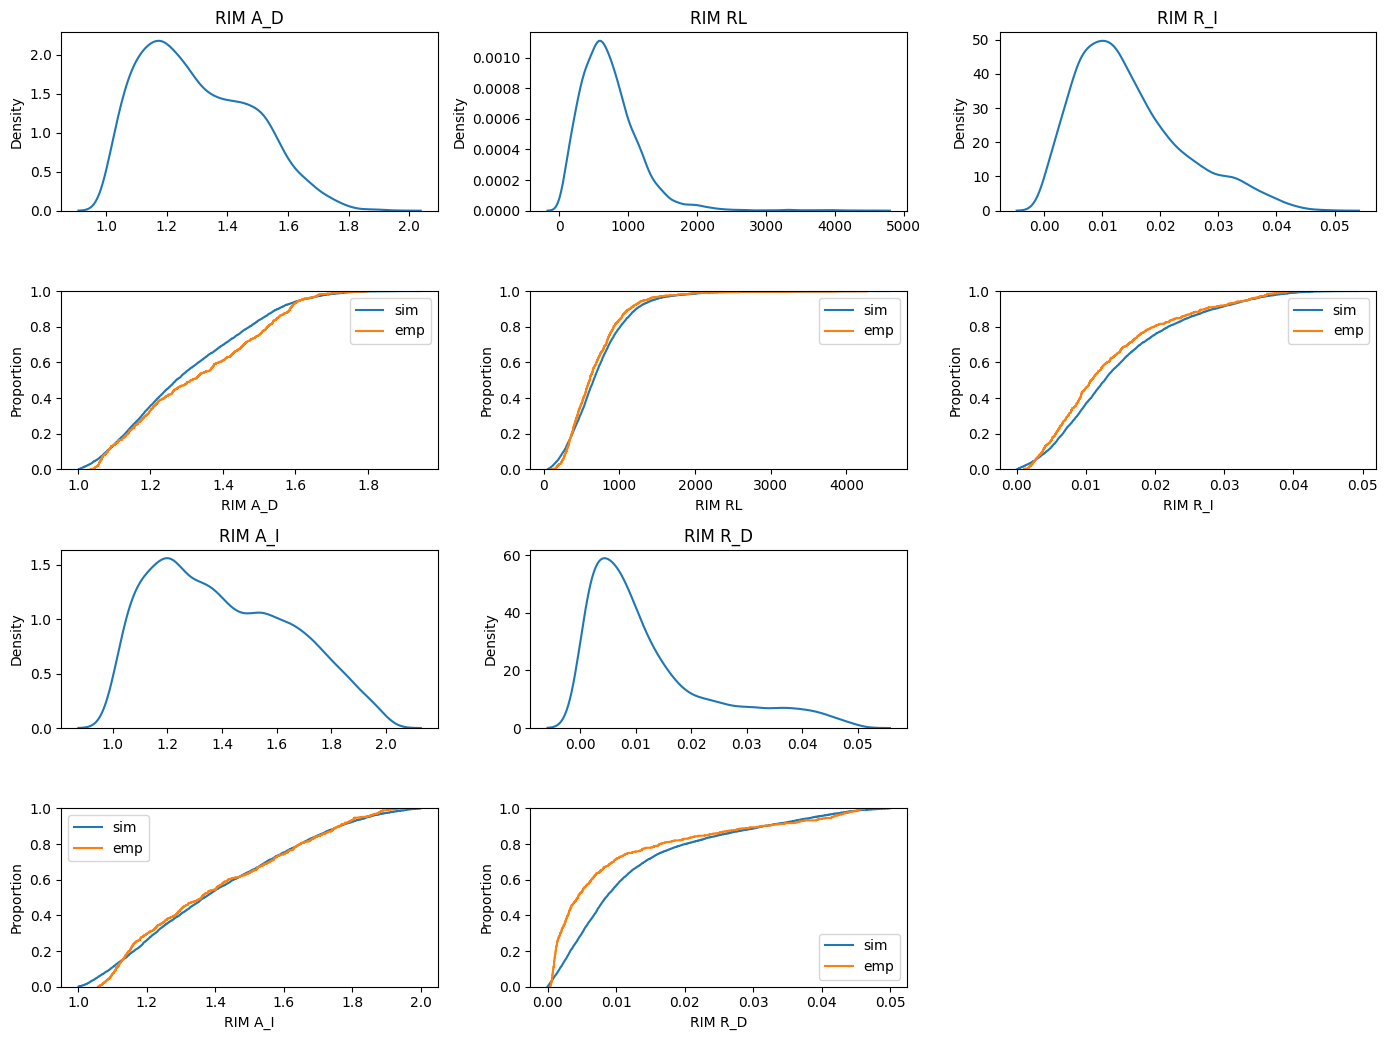

In [5]:
# parameter distributions
emp_indel_params = pd.read_csv('emp_params/emp_indel_params.csv', index_col=0)

display(emp_indel_params)

N = 7000
np.random.seed(1)
# scaling, PCA and KDE
kde_obj = load_kde('emp_pdfs/indel_param_distr') # or kde(emp_indel_params)
sim_indel_params = pd.DataFrame(sample_indel_params(
    *kde_obj, sample_size=N))

fig, axs = plt.subplots(4, 3, figsize=(4 * 3.5, 3 * 3.5))
for i, param in enumerate(sim_indel_params.columns):
    c0, r0 = np.unravel_index(i * 2, (3, 4))
    c1, r1 = np.unravel_index(i * 2 + 1, (3, 4))
    sns.kdeplot(sim_indel_params[param], ax=axs[r0, c0])
    sns.ecdfplot(sim_indel_params[param], ax=axs[r1, c1], label='sim')
    sns.ecdfplot(emp_indel_params[param], ax=axs[r1, c1], label='emp')
    axs[r0, c0].set_title(param)
    axs[r0, c0].set_xlabel('')
    axs[r1, c1].legend()
axs[2, 2].axis('off')
axs[3, 2].axis('off')
plt.tight_layout()

### MSA length simulated vs. empirical MSAs

Text(0.5, 0, 'MSA length')

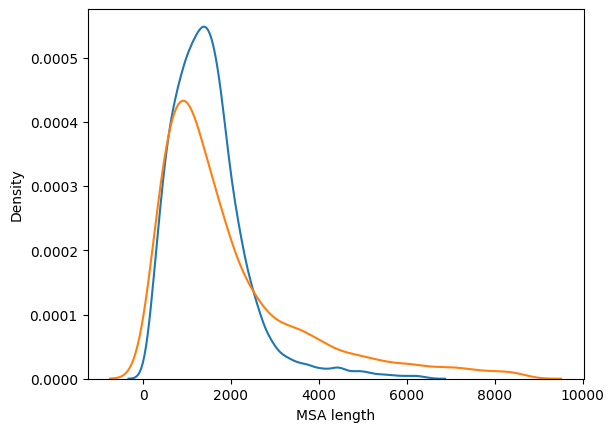

In [9]:
# load MSA lengths (msa_len)
sim_msa_len_indels = np.genfromtxt('emp_params/msa_lens_hogenom_gaps.txt')
emp_msa_len_indels = np.genfromtxt('emp_params/msa_lens_sparta_lg_s256_gc.txt')

# remove outliers
sim_msa_len_indels = sim_msa_len_indels[sim_msa_len_indels < np.quantile(sim_msa_len_indels, 0.99)]
emp_msa_len_indels = emp_msa_len_indels[emp_msa_len_indels < np.quantile(emp_msa_len_indels, 0.99)]

# plot distributions
sns.kdeplot(sim_msa_len_indels, label='sim')
sns.kdeplot(emp_msa_len_indels, label='emp')
plt.xlabel('MSA length')